In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/praktikum_ml/praktikum04/data/calonpembelimobil.csv")
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
#cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
X = df.drop(['ID', 'Beli_Mobil'], axis=1)
y = df['Beli_Mobil']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("=== Evaluasi Model ===")
print("Akurasi :", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC :", roc_auc_score(y_test, y_proba))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


=== Evaluasi Model ===
Akurasi : 0.925
Precision : 0.935251798561151
Recall : 0.9558823529411765
F1-Score : 0.9454545454545454
ROC-AUC : 0.9646139705882353

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        64
           1       0.94      0.96      0.95       136

    accuracy                           0.93       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.93      0.92       200



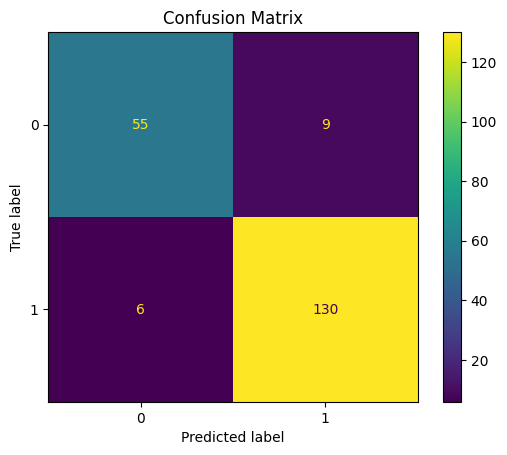

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

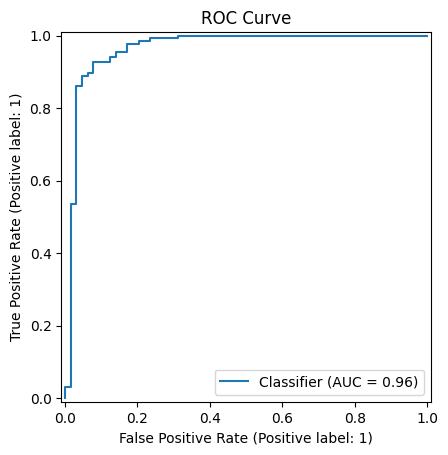

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title('ROC Curve')
plt.show()

In [ ]:
data_baru = pd.DataFrame({
    'Usia': [28, 45],
    'Status': [1, 2],
    'Kelamin': [0, 1],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [180, 300]
})

prediksi_baru = model.predict(data_baru)
print("\nPrediksi pembelian mobil untuk data baru:", prediksi_baru)


Prediksi pembelian mobil untuk data baru: [0 1]
